# Pandas 시각화
판다시 자체적으로 matplotlib 를 기반으로 한 시각화기능을 지원한다.    
Series나 DataFrame에 plot() 함수나 plot accessor를 사용한다.
- https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

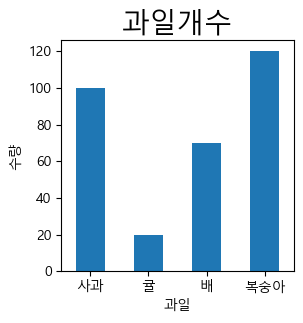

In [11]:
values = pd.Series([100, 20, 70, 120], index=["사과", "귤", "배", "복숭아"])
values.plot(kind="bar", title="과일개수", figsize=(3,3), 
            xlabel="과일", ylabel="수량", rot=0)
# plt.title('과일의 개수')
# plt.xlabel("과일")
# plt.ylabel('수량')
plt.show()

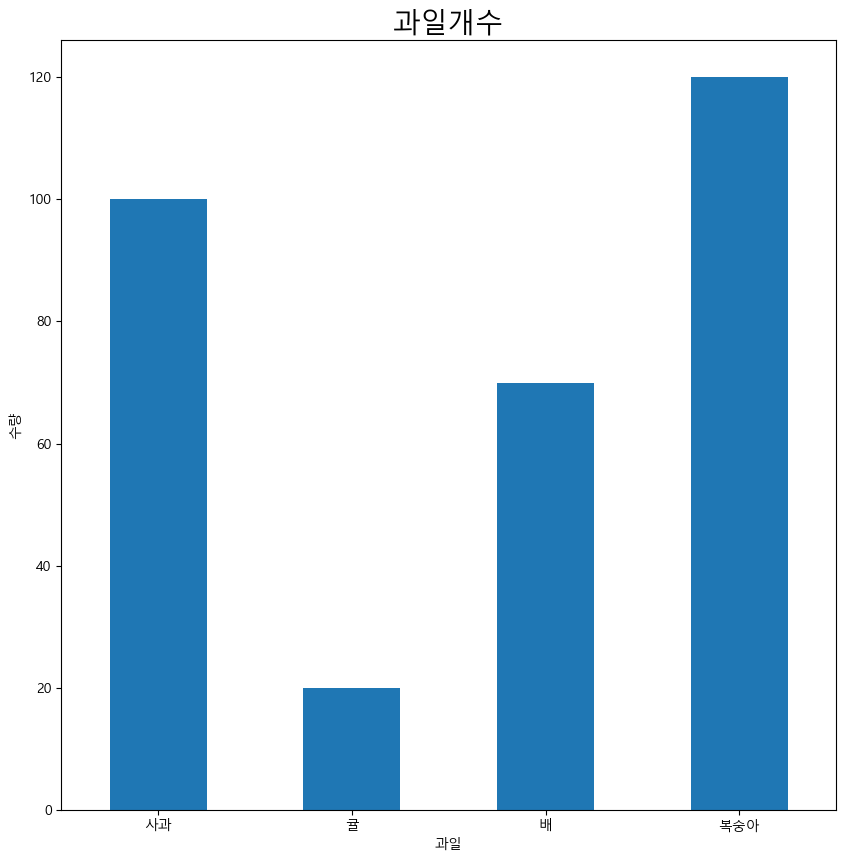

In [12]:
values.plot.bar(title="과일개수", figsize=(10,10), 
                xlabel="과일", ylabel="수량", rot=0)
plt.show()

## plot() 
- kind 매개변수에 지정한 값에 따라 다양한 그래프를 그릴 수 있다.
- kind : 그래프 종류 지정
    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'pie' : pie plot
    - 'scatter' : scatter plot

matplotlib를 이용해 여러 설정들 가능

## 막대 그래프
- index가 무슨 값인지를 가리키는 축으로 사용된다.

In [13]:
tips = pd.read_csv('data/tips.csv')
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [15]:
# 요일별 테이블수
result = tips['day'].value_counts()
result

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

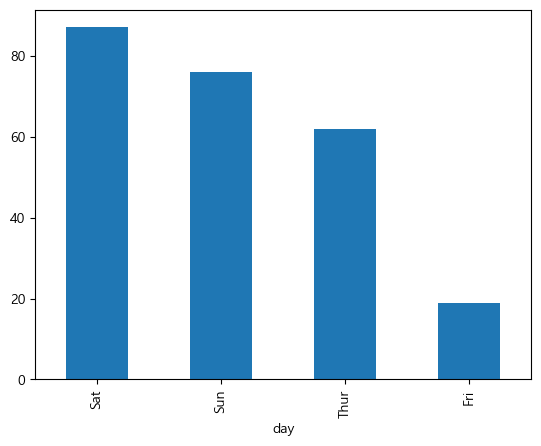

In [19]:
result.plot(kind="bar");

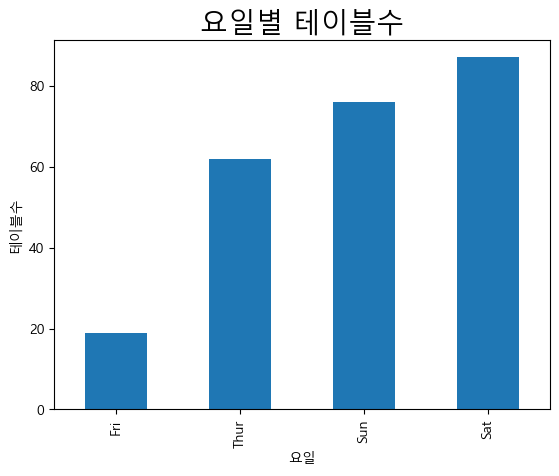

In [27]:
result.sort_values().plot(kind='bar', title="요일별 테이블수",
                          xlabel='요일', ylabel='테이블수');

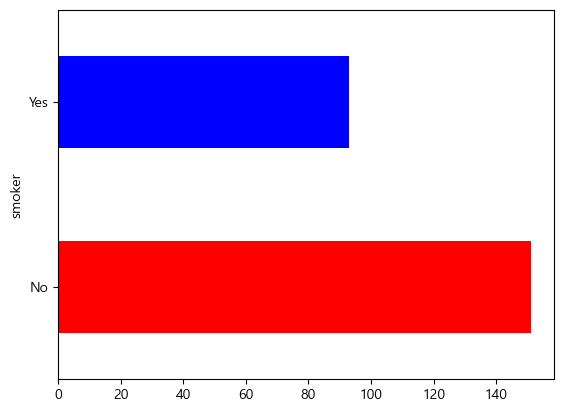

In [32]:
# 흡연여부별 테이블수 
tips['smoker'].value_counts().plot(kind='barh', color=['red', 'blue']);

- 두개의 분류 별로 그리기
    - 여러개의 컬럼일 경우 수평 누적 막대그래프를 그린다.


In [33]:
# 흡연여부+성별 테이블 수
# index-> X축에 넣을 컬럼명(goup으로 묶을 컬럼중에서)
agg_df = tips.pivot_table(index="smoker", columns="sex", values="tip", aggfunc='count')
agg_df

sex,Female,Male
smoker,,
No,54,97
Yes,33,60


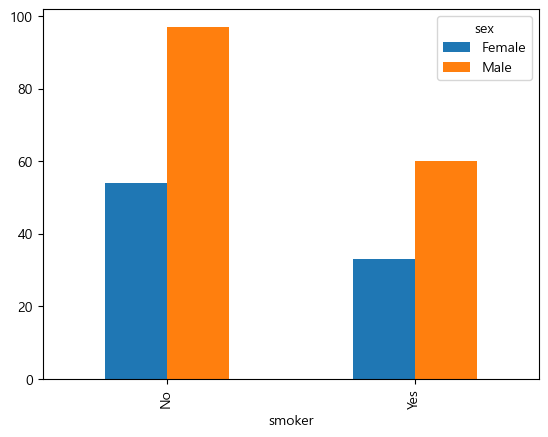

In [34]:
agg_df.plot(kind='bar');

In [35]:
# 요일/성별 손님의 총수 (size의 sum)
result = tips.pivot_table(index="sex", columns='day', values="size", aggfunc="sum")
result

day,Fri,Sat,Sun,Thur
sex,,,,
Female,19,63,53,79
Male,21,156,163,73


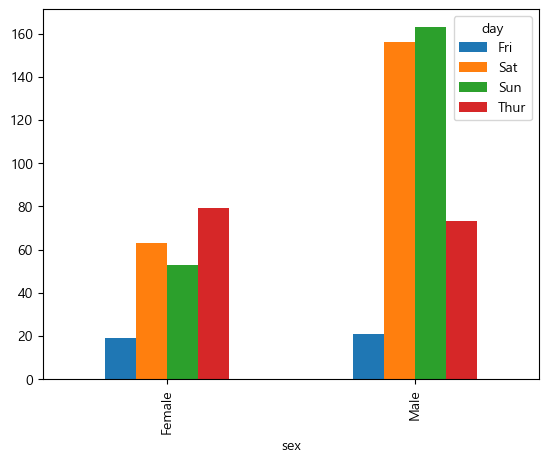

In [36]:
result.plot(kind='bar');

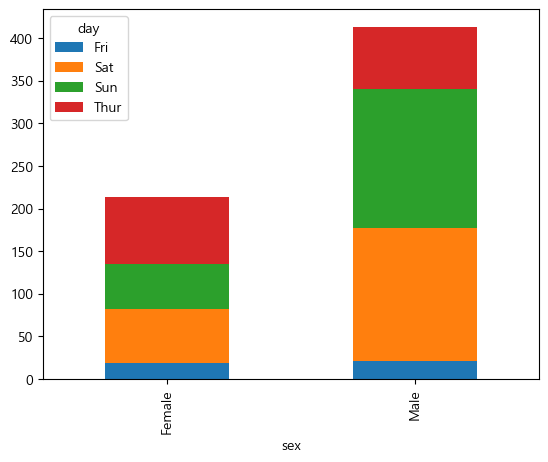

In [37]:
result.plot(kind='bar', stacked=True);

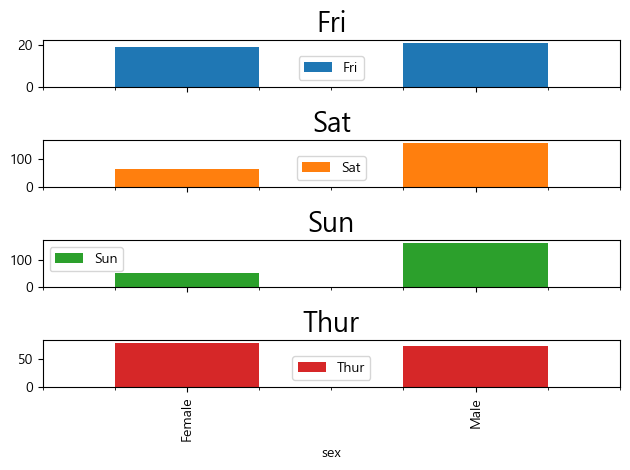

In [43]:
result.plot(kind='bar', subplots=True)#, figsize=(7, 15))
plt.tight_layout()
plt.show()

## 파이차트

## 히스토그램, KDE(밀도그래프)

## Boxplot (상자그래프)

## scatter plot (산점도) 